In [15]:
%load_ext autoreload
%autoreload 2

import warnings

import scanpy as sc
from data_loader import load_mefisto_visium

from famo.core import CORE
from famo.plotting import (
    plot_factor_correlation,
)

warnings.simplefilter(action="ignore", category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
adata = load_mefisto_visium()

/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:275: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitMo

In [6]:
adata

AnnData object with n_obs × n_vars = 2487 × 2000
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg'
    obsm: 'spatial'

In [7]:
model = CORE(device="cuda")
model.fit(
    n_factors=4,
    data=adata,
    factor_prior="GP",
    weight_prior="ARD_Spike_and_Slab",
    covariates_obsm_key="spatial",
    lr=0.005,
    early_stopper_patience=500,
    print_every=100,
    center_groups=True,
    scale_views=False,
    scale_groups=True,
    max_epochs=10000,
    save=True,
    save_path="trained_model",
    init_factors="random",
    init_scale=0.1,
)

Setting up device...
- No device id given. Using default device: 0
- Running all computations on `cuda:0`
- No likelihoods provided. Inferring likelihoods from data.
  - view_1: Normal
- Centering group_1/view_1...


alt.Chart(...)

Initializing factors using `random` method...
Decaying learning rate over 10000 iterations.
Setting training seed to `2408231227`.
Cleaning parameter store.
Epoch:       0 | Time:       0.05s | Loss:    2415.71
Epoch:     100 | Time:       2.51s | Loss:    1862.53
Epoch:     200 | Time:       4.92s | Loss:    1515.40
Epoch:     300 | Time:       7.32s | Loss:    1276.63
Epoch:     400 | Time:       9.75s | Loss:    1133.73
Epoch:     500 | Time:      12.45s | Loss:    1048.20
Epoch:     600 | Time:      14.95s | Loss:    1007.17
Epoch:     700 | Time:      17.51s | Loss:     983.18
Epoch:     800 | Time:      19.94s | Loss:     978.20
Epoch:     900 | Time:      22.41s | Loss:     972.07
Epoch:    1000 | Time:      24.86s | Loss:     970.07
Epoch:    1100 | Time:      27.17s | Loss:     964.80
Epoch:    1200 | Time:      29.45s | Loss:     962.59
Epoch:    1300 | Time:      31.91s | Loss:     965.75
Epoch:    1400 | Time:      34.20s | Loss:     963.25
Epoch:    1500 | Time:      36.48

In [11]:
plot_factor_correlation(model)

alt.HConcatChart(...)

In [14]:
z = model.get_factors()['group_1']
adata.obs = adata.obs.join(z)

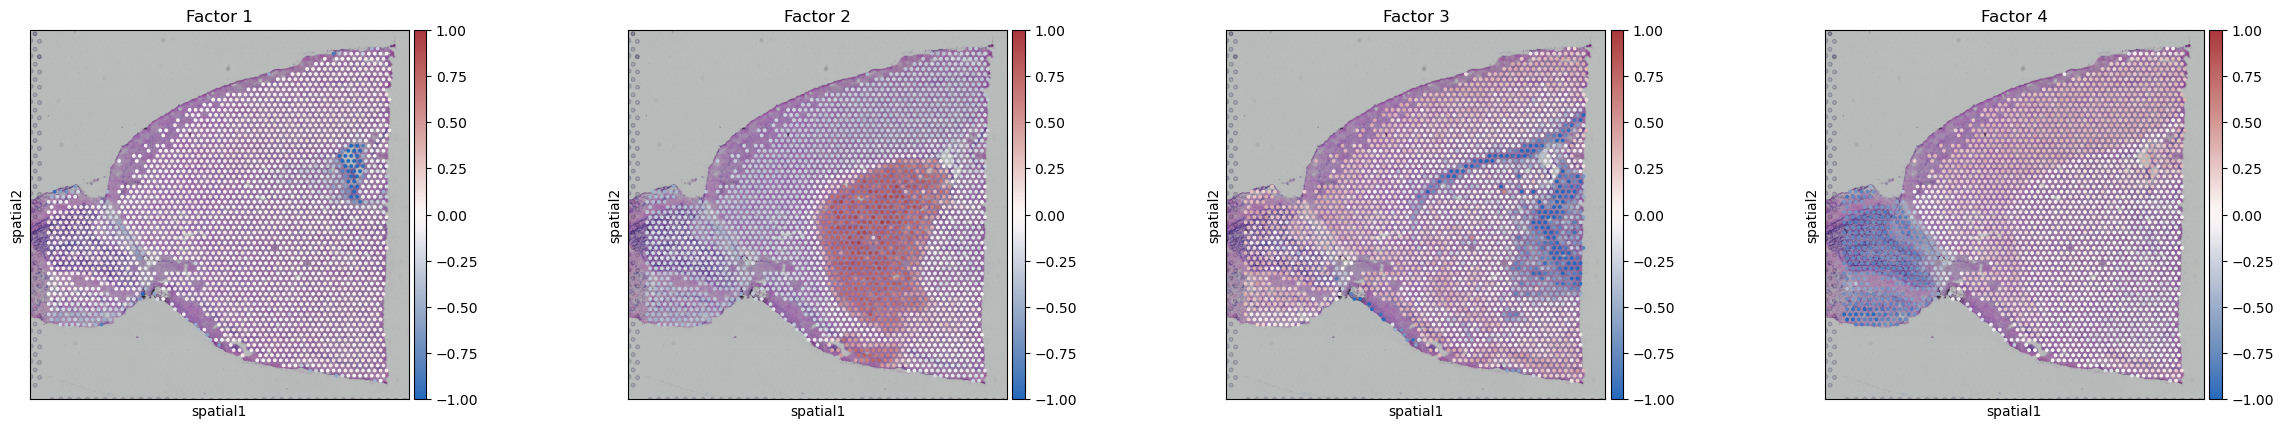

In [21]:
sc.pl.spatial(adata, img_key="hires", color=[f"Factor {i+1}" for i in range(model.n_factors)], cmap="vlag", vmax=1.0, vmin=-1.0)